## Import packages.

In [1]:
%matplotlib inline

# import packages
import numpy as np
import time
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib import gridspec

import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

In [2]:
# define plot properties
from cycler import cycler
import matplotlib.cm as cm

from matplotlib import rcParams
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable

def rgb(r,g,b):
    return (float(r)/256.,float(g)/256.,float(b)/256.)

cb2 = [rgb(31,120,180), rgb(255,127,0), rgb(51,160,44), rgb(227,26,28), \
       rgb(166,206,227), rgb(253,191,111), rgb(178,223,138), rgb(251,154,153)]

rcParams['figure.figsize'] = (9,7.5)
#rcParams['figure.dpi'] = 300

rcParams['lines.linewidth'] = 1

rcParams['axes.prop_cycle'] = cycler('color', cb2)
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid'] = False

rcParams['patch.facecolor'] = cb2[0]
rcParams['patch.edgecolor'] = 'white'

#rcParams['font.family'] = 'Bitstream Vera Sans' 
rcParams['font.size'] = 23
rcParams['font.weight'] = 300


## APOGEE labels.

> Restore all the labels.

In [4]:
# restore data
from astropy.io import fits
hdulist = fits.open('../Catalog_Apogee_Payne.fits.gz')
Teff = hdulist[1].data["Teff"]
Logg = hdulist[1].data["Logg"]
FeH = hdulist[1].data["FeH"]


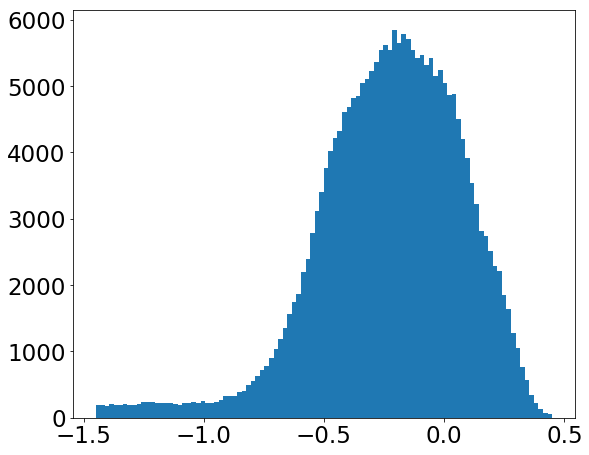

In [5]:
# plot histogram
plt.hist(FeH, bins=100);

> Plot results.

(222707, 3)
(222707, 3)
(222707, 3)
(222707, 1, 3)


Text(0.5, 1.0, '$X = g(z)$ [2D]')

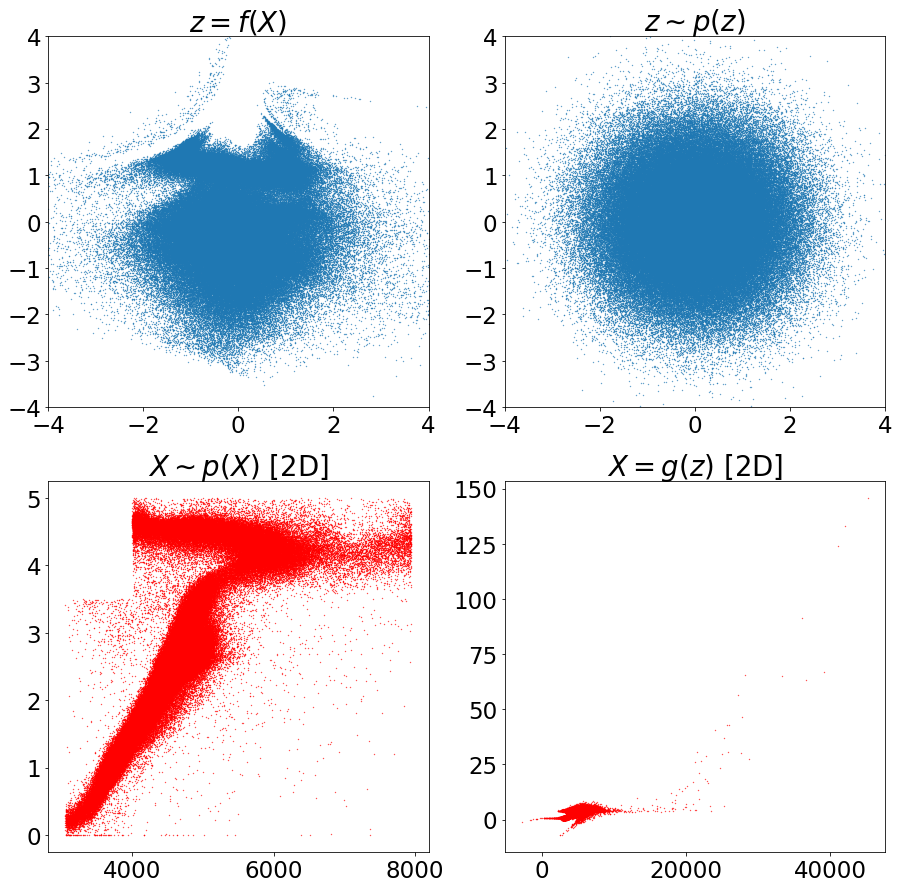

In [8]:
# setup figure
plt.figure(figsize=[15,15]);

# the latent space
temp = np.load("../real_nvp_results.npz")
z = temp["z1"]
print(z.shape)
plt.subplot(221)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.scatter(z[:, 0], z[:, 1], s=0.1)
plt.title(r'$z = f(X)$')

z = temp["z2"]
print(z.shape)
plt.subplot(222)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.scatter(z[:, 0], z[:, 1], s=0.1)
plt.title(r'$z \sim p(z)$')

#-----------------------------------------------------------------------------------------
# the 2D feature space
x = temp["x1"]
print(x.shape)
plt.subplot(223)
#plt.xlim([0,20])
#plt.ylim([0,20])
plt.scatter(x[:, 0], x[:, 1], c='r', s=0.1)
plt.title(r'$X \sim p(X)$ [2D]')

x = temp["x2"]
print(x.shape)
plt.subplot(224)
#plt.xlim([0,20])
#plt.ylim([0,20])
plt.scatter(x[:, 0, 0], x[:, 0, 1], c='r', s=0.1)
plt.title(r'$X = g(z)$ [2D]')
